# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [2]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [3]:
# Import the libraries you'll be using and load the data into a pandas dataframe here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model 
from datetime import datetime
from datetime import date

In [4]:
%matplotlib inline

In [5]:
data=pd.read_csv('household_power_consumption-household_power_consumption.csv', sep=',')

In [6]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [7]:
datadata.shape

(260640, 9)

In [8]:
datadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
Date                     260640 non-null object
Time                     260640 non-null object
Global_active_power      260640 non-null object
Global_reactive_power    260640 non-null object
Voltage                  260640 non-null object
Global_intensity         260640 non-null object
Sub_metering_1           260640 non-null object
Sub_metering_2           260640 non-null object
Sub_metering_3           256869 non-null float64
dtypes: float64(1), object(8)
memory usage: 17.9+ MB


In [9]:
data.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [10]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(256869, 9)

In [12]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [15]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [17]:
data['Datetime']=data['Date'] + data['Time']

In [18]:
data['Global_active_power']=data['Global_active_power'].astype('float')
data['Global_reactive_power']=data['Global_reactive_power'].astype('float')
data['Global_intensity']=data['Global_intensity'].astype('float')
data["Sub_metering_1"]=edata['Sub_metering_1'].astype('float')
data['Sub_metering_2']=data['Sub_metering_2'].astype('float')
data['Voltage']=data['Voltage'].astype('float')
data['Date']=pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Time']=pd.to_timedelta(data['Time'])
data['Datetime']=pd.to_datetime(data['Date'] + data['Time'])

ValueError: time data '1/1/07' does not match format '%d/%m/%Y' (match)

In [19]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Datetime                  object
dtype: object

In [20]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,1/1/070:00:00
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,1/1/070:01:00
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,1/1/070:02:00
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,1/1/070:03:00
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,1/1/070:04:00
5,1/1/07,0:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,1/1/070:05:00
6,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,1/1/070:06:00
7,1/1/07,0:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,1/1/070:07:00
8,1/1/07,0:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,1/1/070:08:00
9,1/1/07,0:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0,1/1/070:09:00


In [20]:
data.count()

Date                     256869
Time                     256869
Global_active_power      256869
Global_reactive_power    256869
Voltage                  256869
Global_intensity         256869
Sub_metering_1           256869
Sub_metering_2           256869
Sub_metering_3           256869
Datetime                 256869
dtype: int64

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

In [ ]:
data.plot()

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [22]:
# Answer here
datasample1=data.iloc[0:1000]

In [23]:
datasample1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00
5,2007-01-01,00:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,2007-01-01 00:05:00
6,2007-01-01,00:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,2007-01-01 00:06:00
7,2007-01-01,00:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,2007-01-01 00:07:00
8,2007-01-01,00:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,2007-01-01 00:08:00
9,2007-01-01,00:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0,2007-01-01 00:09:00


In [24]:
datasample1.describe()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,0 days 08:19:30,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0 days 04:48:49.166165,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0 days 00:00:00,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,0 days 04:09:45,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,0 days 08:19:30,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,0 days 12:29:15,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,0 days 16:39:00,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [25]:
datasample2=data.iloc[74998:75998]

In [26]:
datasample2.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
75000,2007-02-22,02:00:00,2.258,0.052,238.85,9.4,0.0,0.0,0.0,2007-02-22 02:00:00
75001,2007-02-22,02:01:00,2.280,0.048,240.13,9.4,0.0,0.0,0.0,2007-02-22 02:01:00
75002,2007-02-22,02:02:00,2.286,0.046,240.42,9.4,0.0,0.0,0.0,2007-02-22 02:02:00
75003,2007-02-22,02:03:00,2.284,0.048,240.33,9.4,0.0,0.0,0.0,2007-02-22 02:03:00
75004,2007-02-22,02:04:00,2.406,0.000,240.12,10.0,0.0,0.0,0.0,2007-02-22 02:04:00


In [27]:
datasample2.shape

(1000, 10)

In [28]:
datasample2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 75000 to 75999
Data columns (total 10 columns):
Date                     1000 non-null datetime64[ns]
Time                     1000 non-null timedelta64[ns]
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
Datetime                 1000 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(7), timedelta64[ns](1)
memory usage: 85.9 KB


In [29]:
datasample2.describe()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,0 days 10:19:30,1.816898,0.086158,239.824280,7.572200,0.0,0.249000,6.926000
std,0 days 04:48:49.166165,1.172516,0.074981,2.088358,4.927574,0.0,0.552543,8.534833
min,0 days 02:00:00,0.252000,0.000000,233.840000,1.000000,0.0,0.000000,0.000000
25%,0 days 06:09:45,0.719000,0.046000,238.480000,3.000000,0.0,0.000000,0.000000
50%,0 days 10:19:30,1.560000,0.078000,239.755000,6.400000,0.0,0.000000,0.000000
75%,0 days 14:29:15,2.384000,0.114000,241.402500,9.800000,0.0,0.000000,17.000000
max,0 days 18:39:00,8.244000,0.356000,244.970000,35.000000,0.0,2.000000,18.000000


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [31]:
# Answer here - explain your code and reasoning with extra cells for explanation.
datasample1.mean()

Global_active_power        2.384750
Global_reactive_power      0.101824
Voltage                  240.421420
Global_intensity           9.874600
Sub_metering_1             0.000000
Sub_metering_2             0.246000
Sub_metering_3             3.161000
dtype: float64

In [32]:
datasample2.mean()

Global_active_power        1.816898
Global_reactive_power      0.086158
Voltage                  239.824280
Global_intensity           7.572200
Sub_metering_1             0.000000
Sub_metering_2             0.249000
Sub_metering_3             6.926000
dtype: float64

In [34]:
datasample1.std()

Global_active_power      0.573988
Global_reactive_power    0.091648
Voltage                  2.011932
Global_intensity         2.345493
Sub_metering_1           0.000000
Sub_metering_2           0.545694
Sub_metering_3           6.738582
dtype: float64

In [35]:
datasample2.std()

Global_active_power      1.172516
Global_reactive_power    0.074981
Voltage                  2.088358
Global_intensity         4.927574
Sub_metering_1           0.000000
Sub_metering_2           0.552543
Sub_metering_3           8.534833
dtype: float64

## Task 2:Sampling Explanation
The first 1000 rows does not give a true representation of the whole dataset. The mean and standard devition values for each of the two small dataset above did not match. The summary statistic for each of the smaller dataset does not reflect the statistics for the whole dataset.

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [36]:
# Answer
df_small=data.sample(n=10000, replace=True)

In [37]:
df_small

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
59514,2007-02-11,07:54:00,3.058,0.130,241.88,12.6,0.0,0.0,0.0,2007-02-11 07:54:00
69296,2007-02-18,02:56:00,2.452,0.234,239.67,10.2,0.0,2.0,0.0,2007-02-18 02:56:00
73519,2007-02-21,01:19:00,0.216,0.000,241.69,0.8,0.0,0.0,0.0,2007-02-21 01:19:00
153536,2007-04-17,14:56:00,0.264,0.130,241.35,1.2,0.0,0.0,0.0,2007-04-17 14:56:00
20649,2007-01-15,08:09:00,3.052,0.168,238.19,12.8,0.0,1.0,18.0,2007-01-15 08:09:00
209702,2007-05-26,15:02:00,1.602,0.148,233.62,6.8,0.0,0.0,17.0,2007-05-26 15:02:00
256426,2007-06-28,01:46:00,0.174,0.000,238.62,0.8,0.0,0.0,0.0,2007-06-28 01:46:00
22246,2007-01-16,10:46:00,0.336,0.000,240.46,1.6,0.0,0.0,0.0,2007-01-16 10:46:00
226074,2007-06-06,23:54:00,0.250,0.074,237.50,1.0,0.0,1.0,0.0,2007-06-06 23:54:00
109235,2007-03-17,20:35:00,5.118,0.110,233.58,21.8,0.0,0.0,17.0,2007-03-17 20:35:00


In [38]:
df_small.describe()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0 days 11:51:59.766000,1.167393,0.124805,239.231450,4.98566,1.327300,1.652300,5.854400
std,0 days 06:57:38.360043,1.176931,0.114062,3.567967,4.97197,6.626565,6.494784,8.193041
min,0 days 00:00:00,0.084000,0.000000,226.220000,0.40000,0.000000,0.000000,0.000000
25%,0 days 05:44:00,0.296000,0.000000,236.690000,1.40000,0.000000,0.000000,0.000000
50%,0 days 11:52:00,0.568000,0.104000,239.620000,2.60000,0.000000,0.000000,0.000000
75%,0 days 17:51:00,1.616000,0.196000,241.830000,6.80000,0.000000,1.000000,17.000000
max,0 days 23:59:00,7.752000,1.054000,250.890000,33.20000,76.000000,74.000000,19.000000


In [39]:
df_small.mean()

Global_active_power        1.167393
Global_reactive_power      0.124805
Voltage                  239.231450
Global_intensity           4.985660
Sub_metering_1             1.327300
Sub_metering_2             1.652300
Sub_metering_3             5.854400
dtype: float64

In [41]:
df_small.std()

Global_active_power      1.176931
Global_reactive_power    0.114062
Voltage                  3.567967
Global_intensity         4.971970
Sub_metering_1           6.626565
Sub_metering_2           6.494784
Sub_metering_3           8.193041
dtype: float64

##The randomly samples df_small is a better representation of the dataset as a whole

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

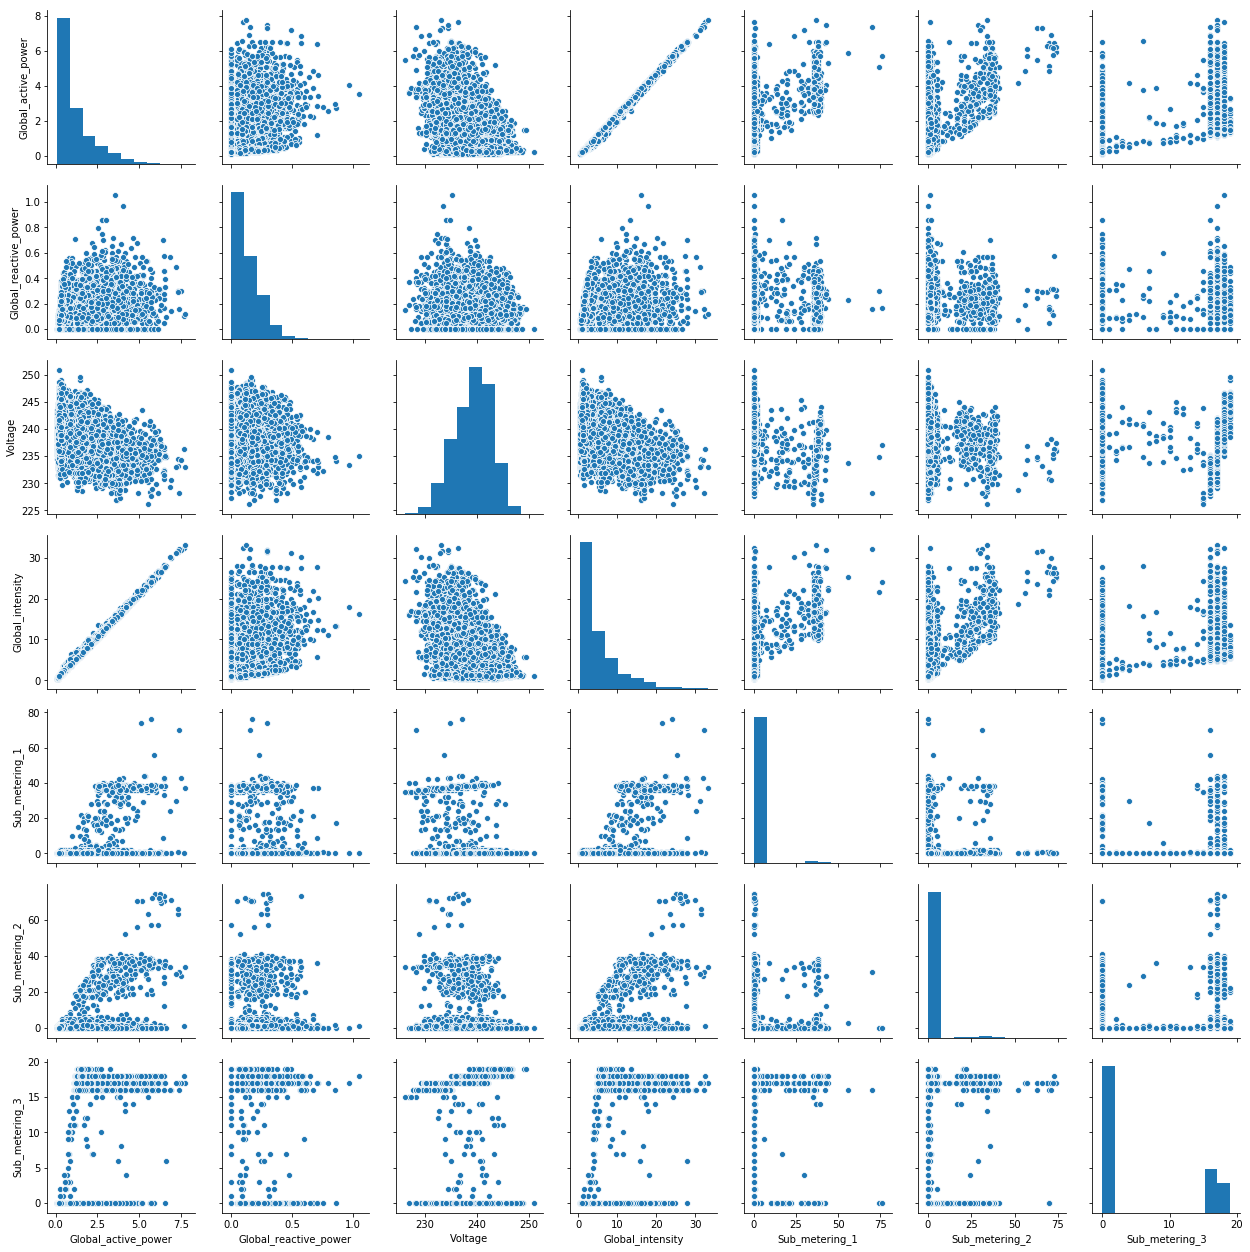

In [43]:
sns.pairplot(df_small)
# plotting pairplot of all the variables in the random sample subset to visualize the relationship between them

In [44]:
#getting correlation coefficient between the columns
c = df_small.corr().abs() 
s = c.unstack() #unstacking the correlation
so = s.sort_values(kind="quicksort") # ordering the output
so

Sub_metering_2         Sub_metering_1           0.073173
Sub_metering_1         Sub_metering_2           0.073173
Sub_metering_3         Global_reactive_power    0.096780
Global_reactive_power  Sub_metering_3           0.096780
                       Voltage                  0.101765
Voltage                Global_reactive_power    0.101765
Sub_metering_3         Sub_metering_2           0.123170
Sub_metering_2         Sub_metering_3           0.123170
Sub_metering_1         Sub_metering_3           0.130649
Sub_metering_3         Sub_metering_1           0.130649
Sub_metering_1         Global_reactive_power    0.148144
Global_reactive_power  Sub_metering_1           0.148144
Sub_metering_2         Voltage                  0.164831
Voltage                Sub_metering_2           0.164831
Global_reactive_power  Sub_metering_2           0.177507
Sub_metering_2         Global_reactive_power    0.177507
Sub_metering_1         Voltage                  0.214459
Voltage                Sub_mete

C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


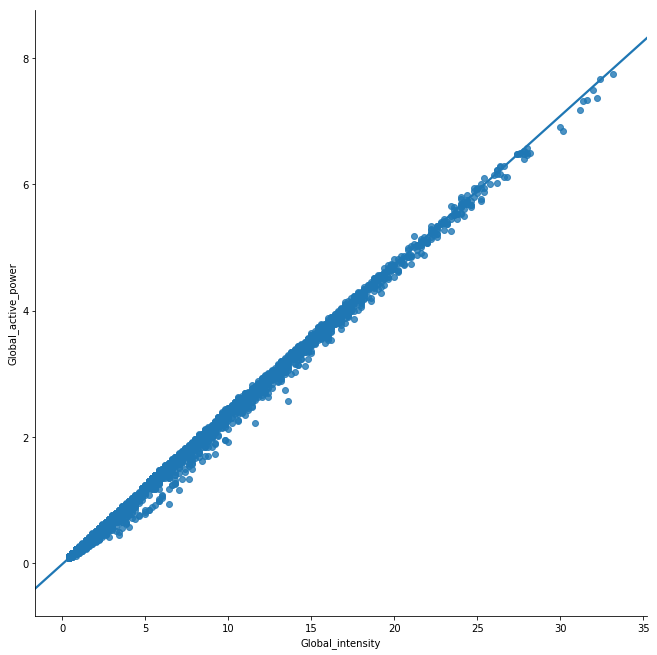

In [45]:
g = sns.lmplot('Global_intensity',   # x-axis
               'Global_active_power',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [46]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Global_intensity'], df_small['Global_active_power'])
print(r)
print(p)


0.9989695922945041


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


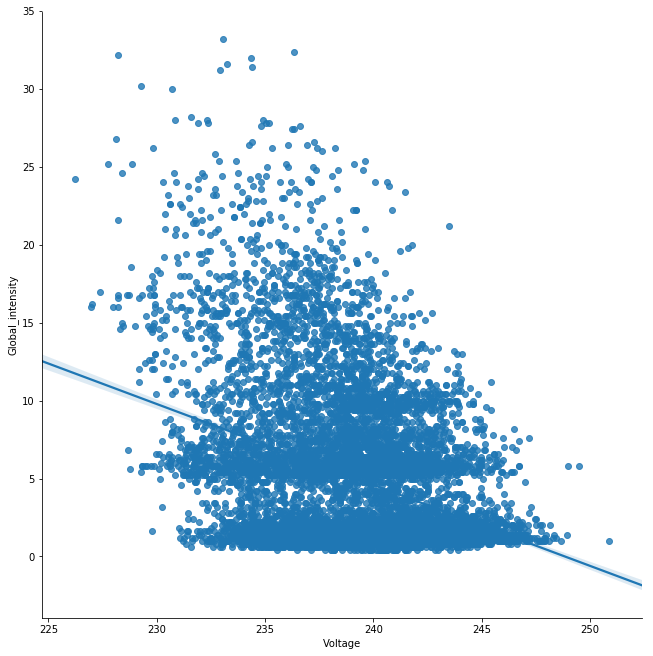

In [47]:
g = sns.lmplot('Voltage',   # x-axis
               'Global_intensity',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(10,10)    # set the size of the figure

In [48]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Voltage'], df_small['Global_intensity'])
print(r)
print(p)

-0.3726814179905486


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


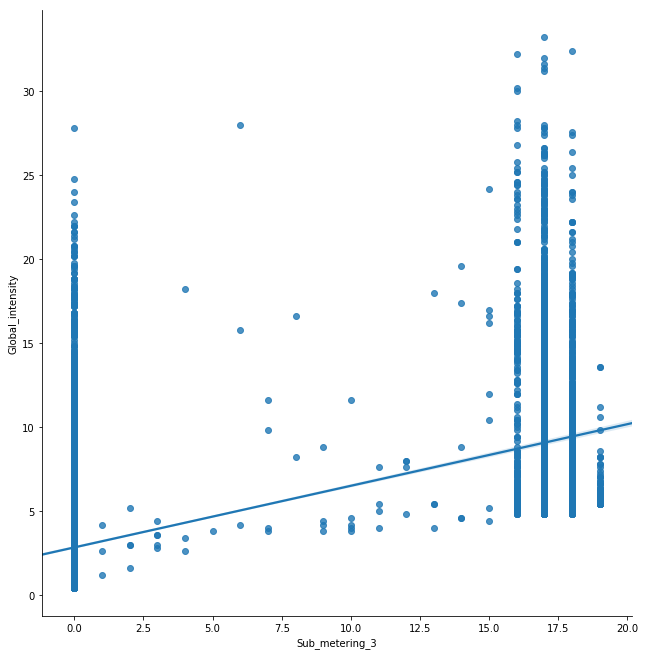

In [49]:
g = sns.lmplot('Sub_metering_3',   # x-axis
               'Global_intensity',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [50]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Sub_metering_3'], df_small['Global_intensity'])
print(r)
print(p)

0.6046112937516639


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


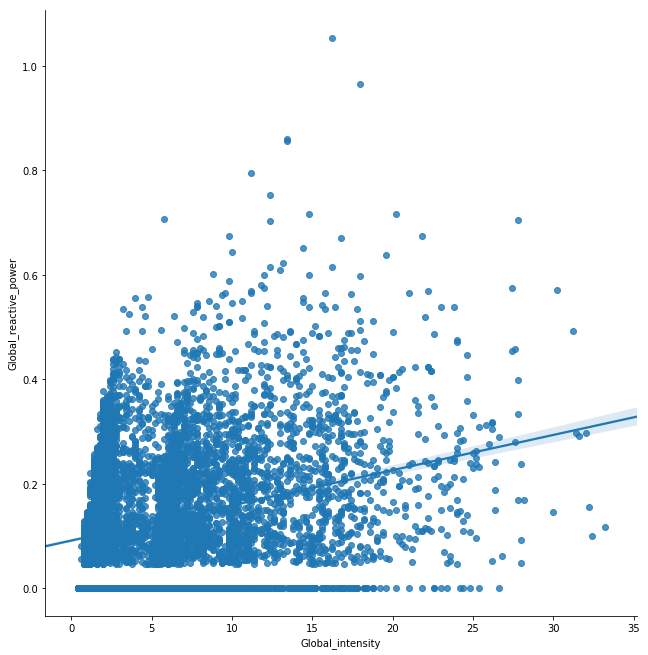

In [51]:
g = sns.lmplot('Global_intensity',   # x-axis
               'Global_reactive_power',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [52]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Global_intensity'], df_small['Global_reactive_power'])
print(r)
print(p)

0.29385244290882534


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


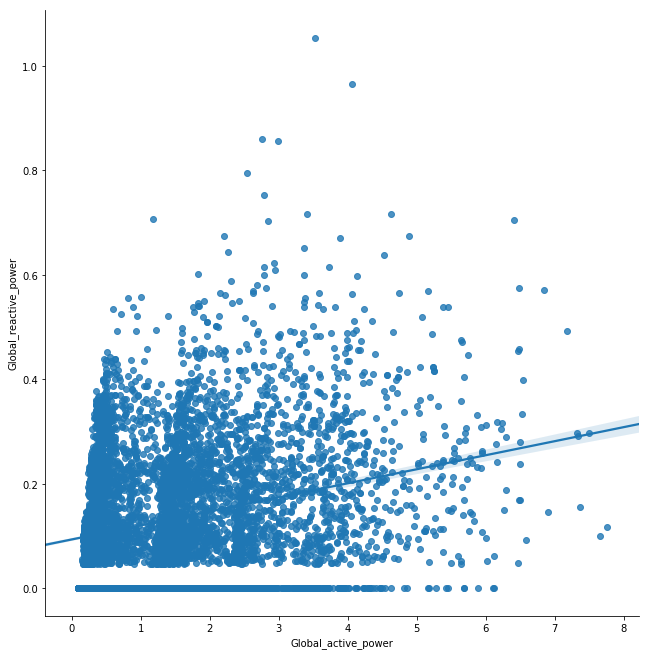

In [53]:
g = sns.lmplot('Global_active_power',   # x-axis
               'Global_reactive_power',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [54]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Global_reactive_power'])
print(r)
print(p)

0.2771205297337041


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


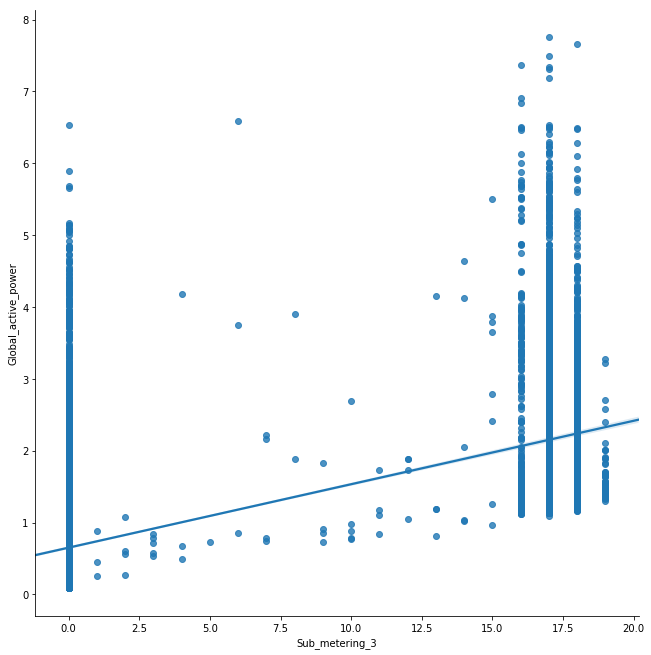

In [55]:
g = sns.lmplot('Sub_metering_3',   # x-axis
               'Global_active_power',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [56]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Sub_metering_3'], df_small['Global_active_power'])
print(r)
print(p)

0.6146830513742609


C:\Users\Stephen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


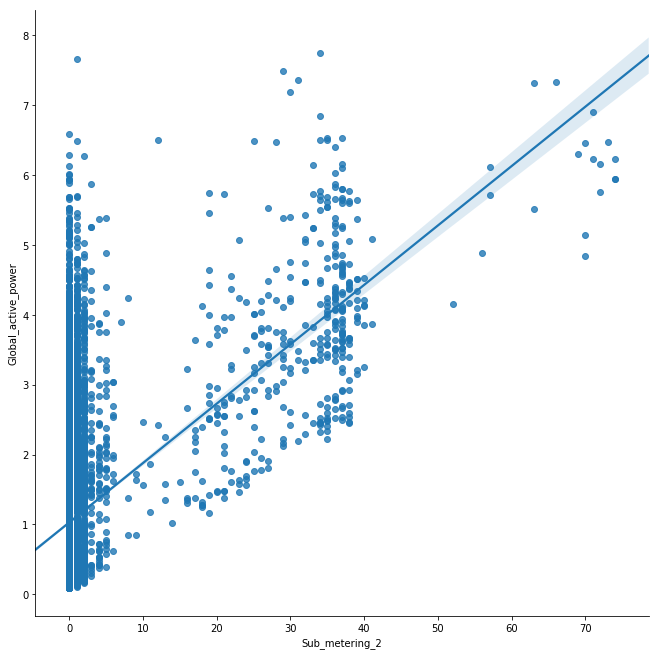

In [57]:
g = sns.lmplot('Sub_metering_2',   # x-axis
               'Global_active_power',# y-axis
               data=df_small,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(5,5)    # set the size of the figure

In [58]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = stats.pearsonr(df_small['Sub_metering_3'], df_small['Global_active_power'])
print(r)
print(p)

0.6146830513742609


## Task 3: Answer
- The following are two pairs of highly correlated variables, see below:
    
    1. Global_intensity (amp) vs Global_active_power (kW) - Correlation Coefficent of 0.9989
    2. Sub_metering1, Sub_metering_2 & Sub_metering_3 vs Global_active_power - Same correlation coefficient of 0.6072


## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [61]:
# Build a simple model and find parameters, as well as the R-Squared Value
# import model from Scikit-learn's sklearn library
from sklearn import linear_model

# initialize the model, and name it HEC_regression_model (Household Electricity Consumption)

HEC_regression_model = linear_model.LinearRegression()

In [62]:
#Fit the model
HEC_regression_model.fit(X = pd.DataFrame(df_small["Global_intensity"]), 
                     y = df_small["Global_active_power"])


print("Model Intercept: ", HEC_regression_model.intercept_)
print("Model Coefficient: ", HEC_regression_model.coef_)

Score=HEC_regression_model.score(X = pd.DataFrame(df_small["Global_intensity"]), 
                     y = df_small["Global_active_power"])

print('Model Score: ', Score)

Model Intercept:  -0.011561796869105079
Model Coefficient:  [0.23646923]
Model Score:  0.997940246329048


## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [63]:
#Using Sub_metering_1 and Sub_metering_3 as the expalnatory variable and Global_active_power as the dependent variable

#initialize the model
multi_HECreg_model = linear_model.LinearRegression()


In [64]:
# Train the model using the df_small['Sub_metering_1'] and df_samll['Sub_metering_3']
multi_HECreg_model.fit(X = df_small.loc[:,["Sub_metering_1","Sub_metering_3"]], 
                     y = df_small["Global_active_power"])
# Check trained model y-intercept
print('Model Intercept:',multi_HECreg_model.intercept_)

# Check trained model coefficients
print('Model coefficient:',multi_HECreg_model.coef_)




Model Intercept: 0.6005199392215861
Model coefficient: [0.07046221 0.08085354]


In [65]:
# Check Score
Score=multi_HECreg_model.score(X = df_small.loc[:,["Sub_metering_1","Sub_metering_3"]], 
                     y = df_small["Global_active_power"])
print('Model Score: ', Score)

Model Score:  0.5325424974748607


In [66]:
#Predict power based on Sub_metering_1 and Sub_metering_3
predictor=multi_HECreg_model.predict(X = df_small.loc[:,["Sub_metering_1","Sub_metering_3"]])

print(predictor)

[0.60051994 0.60051994 0.60051994 ... 0.60051994 0.60051994 1.97503014]


In [67]:
len(predictor)

10000

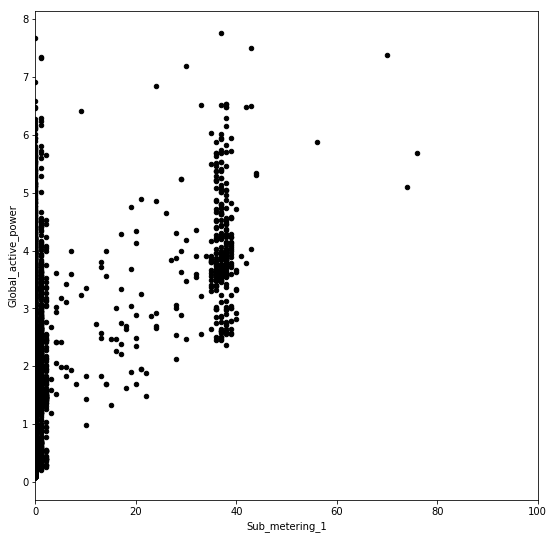

In [68]:
df_small.plot(kind="scatter",
           x="Sub_metering_1",
           y="Global_active_power",
           figsize=(9,9),
           color="black",
           xlim = (0,100))

# Plot regression line
#plt.plot(df_small["Sub_metering_1"],      # Explanitory variable
         #predictor,  # Predicted values
         #color="blue")

In [69]:
#Model Regression on the whole dataset
df_HECreg_model=linear_model.LinearRegression()
# Train the model using the df_small['Sub_metering_1'] and df_samll['Sub_metering_3']
df_HECreg_model.fit(X = electricdata.loc[:,["Sub_metering_1","Sub_metering_3"]], 
                     y = electricdata["Global_active_power"])
# Check trained model y-intercept
print('Model Intercept:',df_HECreg_model.intercept_)

# Check trained model coefficients
print('Model coefficient:',df_HECreg_model.coef_)

# Check Score
Score=df_HECreg_model.score(X = electricdata.loc[:,["Sub_metering_1","Sub_metering_3"]], 
                     y = electricdata["Global_active_power"])
print('Model Score: ', Score)


Model Intercept: 0.5995233744538142
Model coefficient: [0.07220328 0.08045574]
Model Score:  0.5364931782560652


In [70]:
#Predict power based on Sub_metering_1 and Sub_metering_3 for the whole dataset
df_predictor=df_HECreg_model.predict(X = electricdata.loc[:,["Sub_metering_1","Sub_metering_3"]])

print(df_predictor)

[0.59952337 0.59952337 0.59952337 ... 2.04772668 2.04772668 1.96727095]


In [71]:
len(df_predictor)

256869

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

In [72]:
data['Diff1_2'] = (data['Sub_metering_1'] > data['Sub_metering_2']).astype('int')

In [73]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Diff1_2
0,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,0
1,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,0
2,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,0
3,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,0
4,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,0
5,2007-01-01,00:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,2007-01-01 00:05:00,0
6,2007-01-01,00:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,2007-01-01 00:06:00,0
7,2007-01-01,00:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,2007-01-01 00:07:00,0
8,2007-01-01,00:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,2007-01-01 00:08:00,0
9,2007-01-01,00:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0,2007-01-01 00:09:00,0


In [77]:
from sklearn import preprocessing
# Initialize logistic regression model

label_encoder = preprocessing.LabelEncoder()

# Convert Diff variable to numeric
zonediff = label_encoder.fit_transform(data["Diff1_2"])


HEClog_model = linear_model.LogisticRegression()



# Train the model
HEClog_model.fit(X = pd.DataFrame(zonediff), y = data["Sub_metering_2"])


# Check trained model intercept
print(HEClog_model.intercept_)

# Check trained model coefficients
print(HEClog_model.coef_)

HEClog_model.score(X = pd.DataFrame(zonediff), y = data["Sub_metering_2"])

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[  0.70847616  -1.40860746  -2.41578662  -5.46169725  -5.54323813
  -5.79017492  -7.19349576  -8.10018447  -8.46370585  -8.65177619
  -8.60693694  -8.5811264   -8.77915048  -8.12469578  -7.89242436
  -7.77251508  -7.29952348  -6.89211034  -6.88397388  -6.91312611
  -6.99071667  -6.92150194  -6.97306128  -6.90031288  -7.11736421
  -6.99449276  -6.90031288  -6.67510494  -6.63621931  -6.75515646
  -6.84460358  -7.09956668  -7.1679143   -7.0636804   -6.39745488
  -5.87135656  -5.44469308  -5.38343957  -5.81384928  -6.561529
  -7.87119651  -8.6352367   -9.08193612  -9.4058208   -9.61436842
  -9.73608295  -9.73608295  -9.67351336  -9.67351336  -9.73608295
  -9.87318672  -9.61436842  -9.55830346  -9.55830346  -9.73608295
  -9.80247825  -9.61436842  -9.55830346  -9.55830346  -9.27246847
  -9.45426914  -9.1540644   -9.55830346  -9.27246847  -9.35948224
  -9.55830346  -9.11738111  -8.92074922  -9.04765018  -8.78117877
  -8.24369911  -8.1266552   -8.0216552   -8.27517914  -8.16899199
  -9.0476501

0.6754143162468028

In [81]:
HEClog_model.predict(X = pd.DataFrame(zonediff))



array([0., 0., 0., ..., 0., 0., 0.])

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

In [303]:
import calendar
data['Day_name'] = [calendar.day_name[x] for x in data.Datetime.dt.dayofweek]


In [305]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [325]:
kitchen=data[data.Sub_metering_1>0]

kitchen.shape


(23199, 15)

In [363]:
month1_1=kitchen[kitchen.Month==1]

In [369]:
week1=month1_1[month1_1.Day<8]

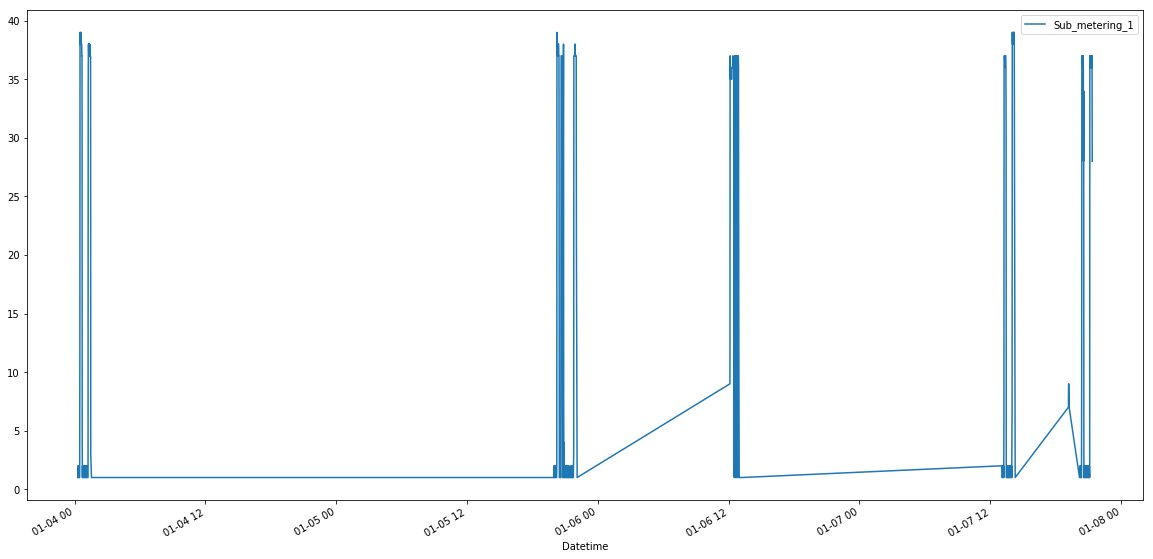

In [371]:
week1.plot(x='Datetime', y='Sub_metering_1', figsize=(20, 10)) #xticks = range(0,  len(week1.index), len(week1.index)//6))
#ax.xaxis_date()

#The Kitchen is used mostly at the following times mornings (to make breakfast), evenings (to make dinner) and weekend

In [366]:
month1_cons=data[data.Month==1]

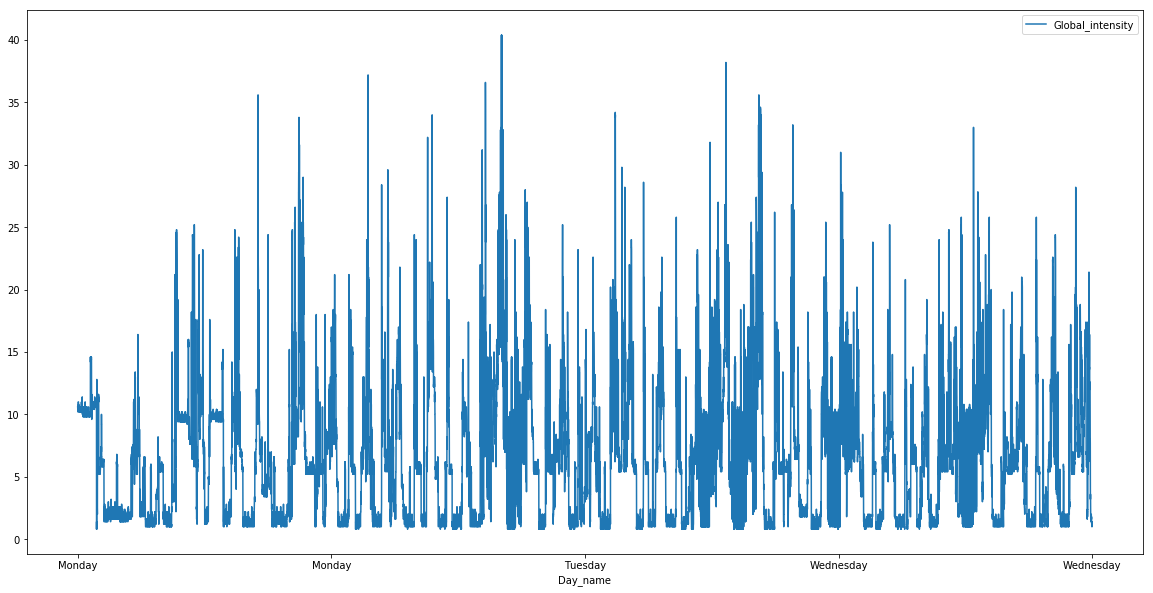

In [368]:
month1_cons.plot(x='Day_name', y='Global_intensity', figsize=(20, 10), xticks = range(0,  len(month1_cons.index), len(month1_cons.index)//4))

#the power consumption varies through the week as seen in the graph above.

Text(0, 0.5, 'Power')

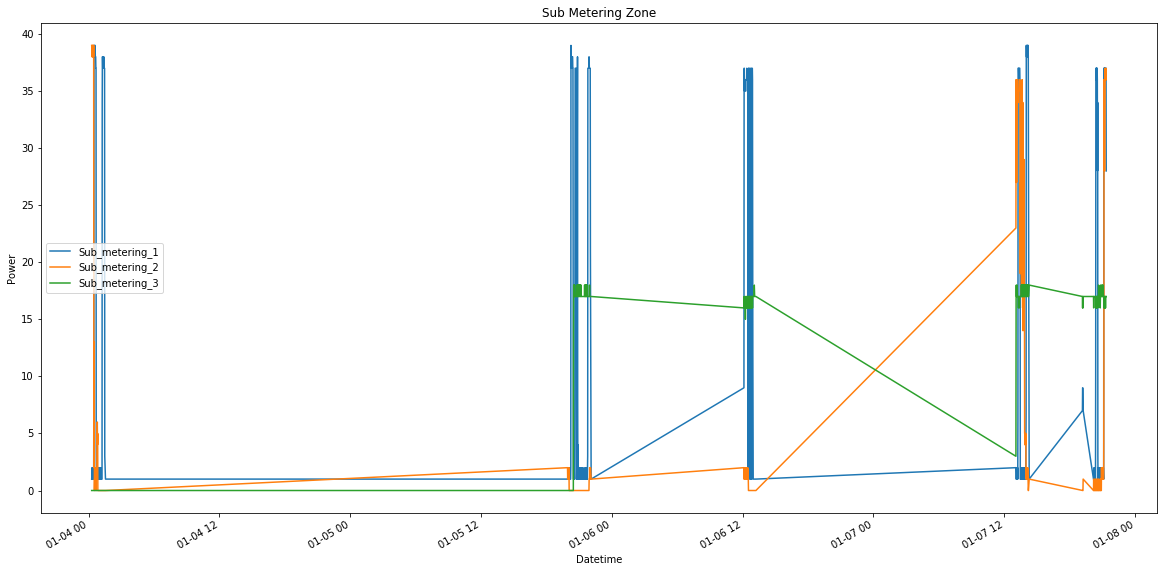

In [372]:
week1.plot(x='Datetime', y=['Sub_metering_1','Sub_metering_2','Sub_metering_3'], figsize=(20, 10))
plt.title('Sub Metering Zone')
plt.ylabel('Power')

#There isn't really any clear difference between Sub-Metering zones